In [0]:
from fastai.vision import *

In [73]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [74]:
cd My Drive/PyTorch_learnings

/gdrive/My Drive/PyTorch_learnings


In [75]:
cd Analytics_Vidhya

/gdrive/My Drive/PyTorch_learnings/Analytics_Vidhya


In [0]:
# !sudo apt-get install unzip

In [77]:
ls

data/                             sample_submission_yxjOnvz.csv
Image_classfication_fastai.ipynb  Untitled0.ipynb


In [0]:
# !unzip train_SOaYf6m.zip

In [79]:
ls

data/                             sample_submission_yxjOnvz.csv
Image_classfication_fastai.ipynb  Untitled0.ipynb


In [80]:
pwd

'/gdrive/My Drive/PyTorch_learnings/Analytics_Vidhya'

In [0]:
path = '/gdrive/My Drive/PyTorch_learnings/Analytics_Vidhya/data/'
# path_img = '/home/whirldata/Documents/AV/train_SOaYf6m/images'

In [0]:
tfms = get_transforms(
    do_flip=True, 
    max_zoom=0.5,
    p_lighting=0.4,
    p_affine=0.3,
    max_rotate=1
    
)

In [82]:
ls

data/                             sample_submission_yxjOnvz.csv
Image_classfication_fastai.ipynb  Untitled0.ipynb


In [83]:
from fastai import *
from fastai.vision import *

data = ImageDataBunch.from_csv(path,folder = 'images', csv_labels = "train.csv", ds_tfms =tfms)
data.normalize(imagenet_stats)



ImageDataBunch;

Train: LabelList (1317 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
0,0,0,0,0
Path: /gdrive/My Drive/PyTorch_learnings/Analytics_Vidhya/data;

Valid: LabelList (329 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
0,1,1,0,0
Path: /gdrive/My Drive/PyTorch_learnings/Analytics_Vidhya/data;

Test: None

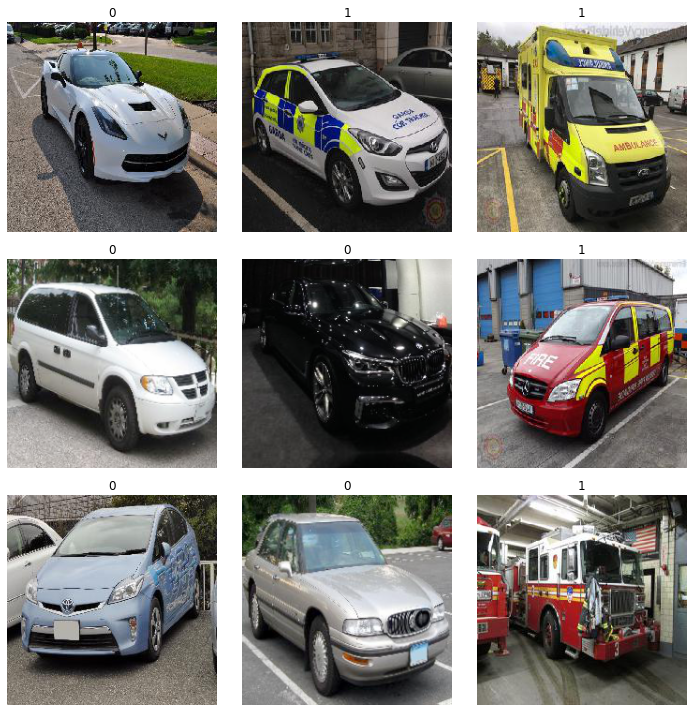

In [84]:
data.show_batch(rows=3, figsize=(10,10))

In [49]:
learn = create_cnn(data,models.resnet50,pretrained = True,metrics = accuracy)
learn.fit_one_cycle(5)






/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,accuracy,time
0,0.588734,0.523383,0.905775,10:48
1,0.390616,0.353901,0.914894,10:40
2,0.285656,0.284465,0.917933,11:02
3,0.217133,0.302120,0.911854,10:42
4,0.165045,0.285538,0.917933,10:36


In [68]:
pwd

'/gdrive/My Drive/PyTorch_learnings/Analytics_Vidhya'

In [0]:
#Save Panu da model ah..........

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,accuracy,time
0,0.085775,0.281387,0.924012,14:43
1,0.066807,0.293660,0.930091,14:45
2,0.052534,0.285274,0.927052,14:29


The validation accuracy is 93.00911712646484 %.


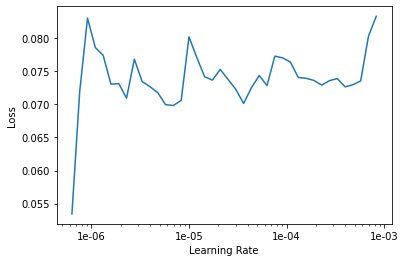

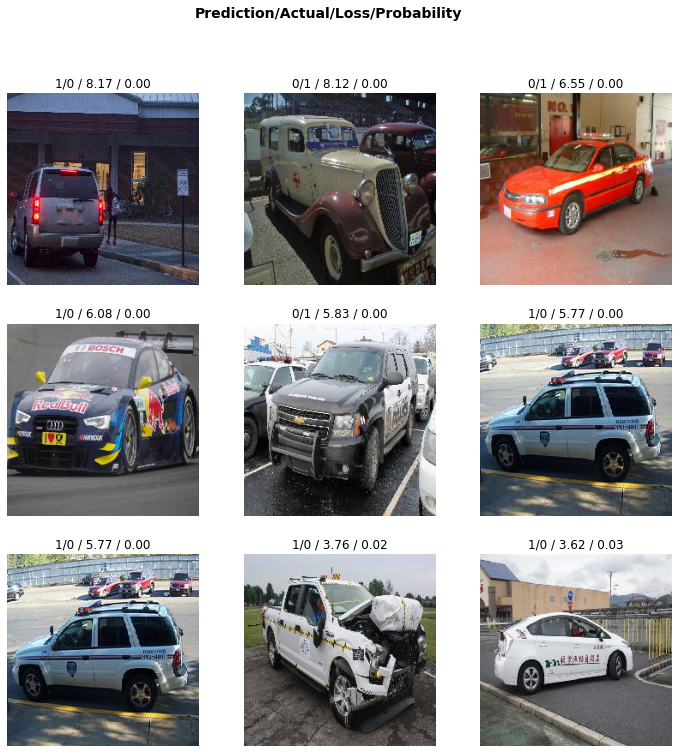

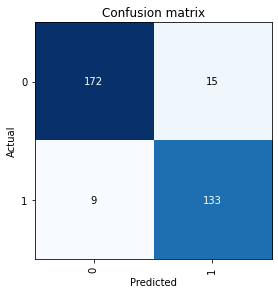

In [50]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()
learn.fit_one_cycle(3,max_lr = slice(1e-6,3e-4))

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(20)
interp.plot_confusion_matrix()
preds,y = learn.TTA()
acc = accuracy(preds, y)
print('The validation accuracy is {} %.'.format(acc * 100))

In [1]:
# interp.plot_top_losses(20)

In [2]:
# learn.recorder.plot_losses()

In [52]:
acc*100

tensor(93.0091)

In [0]:
learn.save("Model-93")

In [0]:
learn.export('export.pkl')

In [90]:
pwd

'/gdrive/My Drive/PyTorch_learnings/Analytics_Vidhya'

In [0]:
learner1=load_learner('/gdrive/My Drive/PyTorch_learnings/Analytics_Vidhya/data')

In [95]:
learner1

Learner(data=ImageDataBunch;

Train: LabelList (0 items)
x: ImageList

y: CategoryList

Path: /gdrive/My Drive/PyTorch_learnings/Analytics_Vidhya/data;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: /gdrive/My Drive/PyTorch_learnings/Analytics_Vidhya/data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_

In [0]:
df_test=pd.read_csv('/gdrive/My Drive/PyTorch_learnings/Analytics_Vidhya/data/test.csv')

In [0]:
from fastai import *

In [121]:
path

'/gdrive/My Drive/PyTorch_learnings/Analytics_Vidhya/data/'

In [0]:
test_df=pd.read_csv('/gdrive/My Drive/PyTorch_learnings/Analytics_Vidhya/test.csv')

In [60]:
test_df

,image_names
0,1960.jpg
1,668.jpg
2,2082.jpg
3,808.jpg
4,1907.jpg
...,...
701,674.jpg
702,1027.jpg
703,447.jpg
704,2176.jpg


In [124]:
test_df['image_names'][0]

'1960.jpg'

In [0]:
res=[]

In [0]:
# img='/gdrive/My Drive/PyTorch_learnings/Analytics_Vidhya/data/images/%s',str(test_df[0])
str1='/gdrive/My Drive/PyTorch_learnings/Analytics_Vidhya/data/images/'
for i in range(len(test_df)):
    str2=str(test_df['image_names'][i])
    img=str1+str2
    # print(img)
    cat, tensor, probs = learn.predict(open_image(img))
    pred=tensor.item()
    res.append(pred)

In [160]:
res

[0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,


In [0]:
test_df['emergency_or_not']=res

In [0]:
test_df.columns=['image_names','emergency_or_not']

In [162]:
test_df

,image_names,emergency_or_not
0,1960.jpg,0
1,668.jpg,1
2,2082.jpg,0
3,808.jpg,1
4,1907.jpg,0
...,...,...
701,674.jpg,1
702,1027.jpg,0
703,447.jpg,1
704,2176.jpg,0


In [0]:
test_df.to_csv('sub1.csv')

In [141]:
tensor

tensor(1)

In [142]:
cat


Category tensor(1)